In [1]:
import sys
sys.path.append('../..')

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:39:13.809956. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [20]:
from astropy import units as u1
from IPython.display import Image

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:55:58.605876. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [2]:
import pocs.utils.signal_to_noise as snr
from pocs.utils import hdr

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:39:23.110667. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Create Imager objects from performance.yaml config file

In [3]:
imagers = snr.create_imagers()

/home/ajh/Documents/virtualenvs/Python3.5.2/lib/python3.5/site-packages/astropy/io/ascii/connect.py:80: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/ajh/Documents/Work/POCS/resources/performance_data/canon_throughput.csv' encoding='UTF-8'>
  return read(filename, **kwargs)
/home/ajh/Documents/virtualenvs/Python3.5.2/lib/python3.5/site-packages/astropy/io/ascii/connect.py:80: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/ajh/Documents/Work/POCS/resources/performance_data/ML8300M_QE.csv' encoding='UTF-8'>
  return read(filename, **kwargs)
/home/ajh/Documents/virtualenvs/Python3.5.2/lib/python3.5/site-packages/astropy/io/ascii/connect.py:80: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/ajh/Documents/Work/POCS/resources/performance_data/astrodon_r.csv' encoding='UTF-8'>
  return read(filename, **kwargs)
/home/ajh/Documents/virtualenvs/Python3.5.2/lib/python3.5/site-packages/astropy/io/ascii/connect.py:80: ResourceWarning: unclosed file <_io

# Create a sequence of exposures using an Imager object

In [11]:
imager = imagers['canon_sbig_g']

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:48:19.906743. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [12]:
exposure_parameters = {'bright_limit': 10  * u.ABmag,
                       'exp_time_ratio': 2,
                       'longest_exp_time': 300 * u.second,
                       'num_long_exp': 1}

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:48:22.502833. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [13]:
explist = imager.exp_time_sequence(**exposure_parameters)
explist

<Quantity [   2.34,   4.69,   9.38,  18.75,  37.5 ,  75.  , 150.  , 300.  ] s>

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:48:27.174763. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Calculate total exposure time and total elapsed time

In [15]:
explist.sum()

<Quantity 597.66 s>

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:49:07.472102. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [16]:
imager.total_elapsed_time(explist)

<Quantity 633.66 s>

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:49:15.405986. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Calculate point saturation limits

In [17]:
imager.point_source_saturation_mag(explist)

<Quantity [  9.5203569 , 10.27535025, 11.02812661, 11.78052513,
            12.53390587, 13.28809415, 14.04390292, 14.80297452] mag(AB)>

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:50:27.002824. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


# Plot point source SNR versus magnitude

In [18]:
mags, snrs = imager.snr_vs_ABmag(explist, plot='snr_vs_mag_example.png')

/home/ajh/Documents/virtualenvs/Python3.5.2/lib/python3.5/site-packages/astropy/units/quantity.py:841: RuntimeWarning: invalid value encountered in true_divide
  return super(Quantity, self).__truediv__(other)
/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:55:19.282661. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


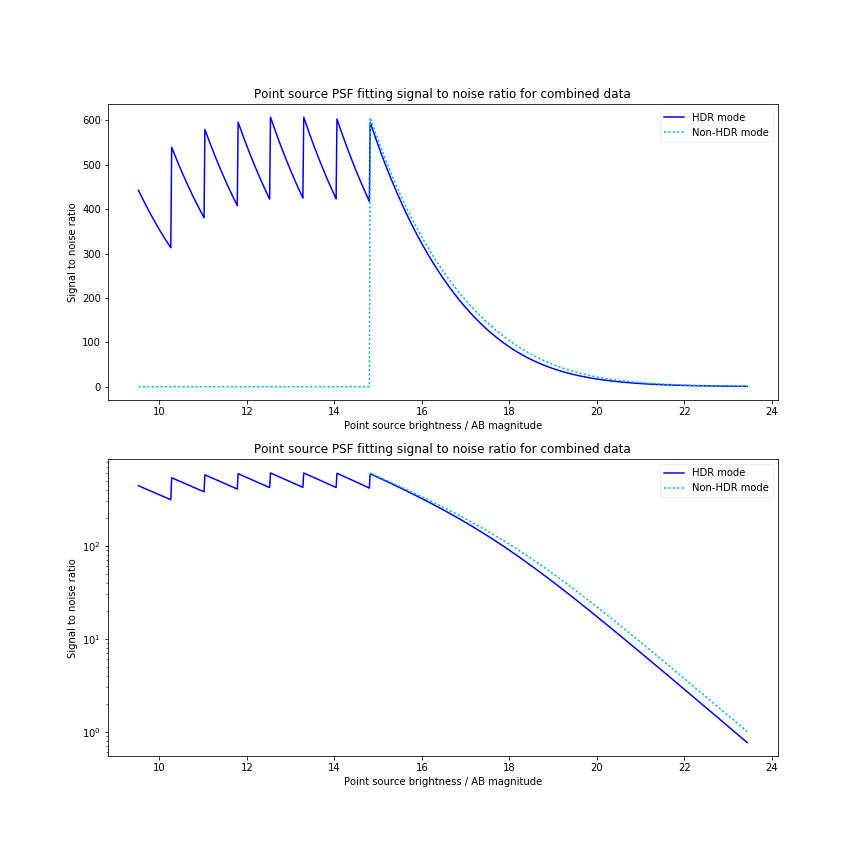

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 22:56:02.890898. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
Image('snr_vs_mag_example.png')

# Generates a list of target details for a sequence of dithered, HDR exposures

In [25]:
name = 'M6 Toll'
base = "16h52m42.2s -38d37m12s"

target_list = hdr.get_target_list(target_name=name,
                                  imagers=imagers,
                                  primary_imager='canon_sbig_g',
                                  base_position=base,
                                  exposure_parameters=exposure_parameters)
target_list

[{'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h52m38.8129s -38d36m36.2042s',
  'priority': 100,
  'visit': {'primary_exptime': 2.34, 'primary_nexp': 1}},
 {'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h52m42.3649s -38d09m09.2687s',
  'priority': 100,
  'visit': {'primary_exptime': 4.69, 'primary_nexp': 1}},
 {'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h55m19.9429s -38d06m24.3844s',
  'priority': 100,
  'visit': {'primary_exptime': 9.38, 'primary_nexp': 1}},
 {'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h55m04.2247s -38d35m54.3096s',
  'priority': 100,
  'visit': {'primary_exptime': 18.75, 'primary_nexp': 1}},
 {'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h55m30.9177s -39d06m49.203s',
  'priority': 100,
  'visit': {'primary_exptime': 37.5, 'primary_nexp': 1}},
 {'frame': 'icrs',
  'name': 'M6 Toll',
  'position': '16h52m56.9292s -39d07m32.1524s',
  'priority': 100,
  'visit': {'primary_exptime': 75.0, 'primary_nexp': 1}},
 {'frame':

/usr/lib64/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-03-26 23:05:15.006249. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)
